In [2]:
import torch
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [3]:
transform = transforms.Compose([
    ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [4]:
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15847735.97it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 486045.63it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3800121.98it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8333564.64it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

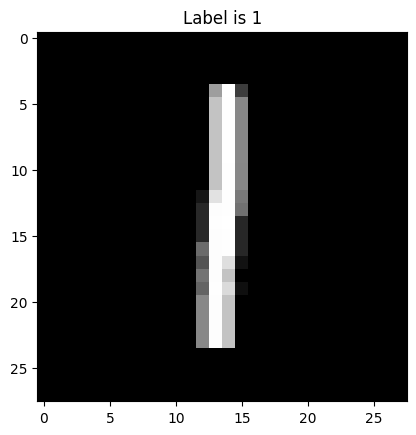

In [7]:
dataiter = iter(train_loader) # load as 1875 Batches
images, labels = next(dataiter) # Load a single batch with 32 images

plt.imshow(images[0].numpy().squeeze(), cmap='gray')
plt.title(f"Label is {labels[0]}")
plt.show()

In [8]:
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.fc1 = nn.Linear(28*28, 128) # input, output
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    x = x.view(-1, 28*28) # get the data in the shape of 1,784
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.softmax(self.fc3(x))
    return x

model = Network()
print(model)

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
epochs = 10
for epoch in range(epochs):
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  print(f"Epoch {epoch+1} loss: {running_loss/len(train_loader)}")

<ipython-input-8-121a77fbb7b0>:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc3(x))


Epoch 1 loss: 1.6094361113230387
Epoch 2 loss: 1.5395136164347332
Epoch 3 loss: 1.5240542464574178
Epoch 4 loss: 1.515982992553711
Epoch 5 loss: 1.512317774327596
Epoch 6 loss: 1.5081589465459189
Epoch 7 loss: 1.5057147207895916
Epoch 8 loss: 1.5040119616190593
Epoch 9 loss: 1.5006077802658082
Epoch 10 loss: 1.4992900513331096


In [11]:
correct = 0
total = 0
with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(f"Test Accuracy: {100*correct/total}")

<ipython-input-8-121a77fbb7b0>:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc3(x))


Test Accuracy: 96.08


# In Class Assignment -
Implement the Regression using Pytorch,  Reference data for task - https://colab.research.google.com/drive/1k1Y2sb0Tc4pKmbbfWuWo81CHfG3yT8Ev?usp=sharing